# Linear Regression : diabetic

___How can we predict diabetes figures with relevant data?___  

---

## (1) Loading data

In [134]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X, df_y = diabetes.data, diabetes.target

_description of diabetes_

In [135]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

As we can see in this sentence,  
 \- Number of Attributes: First 10 columns are numeric predictive values

All data is numeric. So we dont need to convert string into numeric.

_df_X's type_

In [136]:
type(df_X)

numpy.ndarray

## (2) Spliting train, test data-set

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=10)

_shape of train data and type_

In [138]:
print(X_train.shape)
print(type(X_train))

(331, 10)
<class 'numpy.ndarray'>


## (3) Modeling

### (3-1) define functions

___linear___

In [139]:
def model(X, W, b):
    return X.dot(W) + b

___loss___

In [140]:
def loss(X, W, b, y):
    def mse(a, b):
        se = (a-b)**2
        return se.mean()

    predictions = model(X, W, b)
    return mse(predictions, y)

___gradient___

In [141]:
def gradient(X, W, b, y):
    N = len(X)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

### (3-2) initiate hyper-parameter; it can be changed by user.

In [142]:
STEP_SIZE = 0.01
LEARN_CYCLE = 200000

### (3-3) get the model fitted

In [143]:
import numpy as np

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

losses = []
for i in range(1, LEARN_CYCLE + 1):
    dW, db = gradient(X_train, W, b, y_train)
    W -= dW*STEP_SIZE
    b -= db*STEP_SIZE
    L = loss(X_train, W, b, y_train)
    losses.append(L)

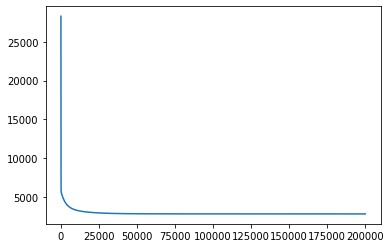

In [144]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

### (3-4) compare with sklearn model

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
y_pred = sk_model.predict(X_test)

## my model's result

In [146]:
losses[-1]

2858.5506881890315

## sklearn's result

In [147]:
mean_squared_error(y_test, y_pred)

2962.713763703787

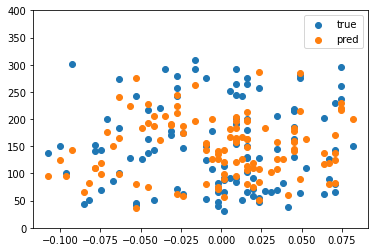

In [148]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], y_pred, label="pred")
plt.ylim(0, 400)
plt.legend()
plt.show()

# 회고

가장 기본적인 모델링 학습이었고 대단히 도움이 되었다.  
이번 익스를 통해 배운 것을 정리하면

 \- 해석미분에서 xi 와 ypred - y의 곱을 반복문을 사용하지 않고 matrix로 처리하기 위해 X.T.dot()으로 간단하게 구현 가능하는 것  
 \- 손실함수를 경사하강법을 통해 줄여나가는 과정  
 \- 수치미분과 해석미분의 차이  
 
그 동안 실습을 하며 느낀 것 중 나를 가장 두렵게 한 것은  
___내가 하는 작업 중 어떤 것도 내가 만든 것은 없다는 것이다.___  
데이터셋도 이미 주어져있고 모델링도 가져다 쓰는 것이 전부, 게다가 코드도 어려운 편이 아니다. 
  
현장에서 인공지능 엔지니어에게 필요로 하는 것은 무엇인가?에 대한 해답을 찾던 중,  
이런 식으로 모델의 원리를 이해하며 딥러닝 지식을 쌓고  
백엔드 엔지니어링을 추가로 배우면 목표에 가까워 질 것이라 확신을 주는 익스였다.